# ¡Hola Pablo! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima. Si en algún punto tienes comentarios, siéntete libre de dejarlos también. Al final del notebook, te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso.:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# ANALISIS DE NEGOCIO

En el presente proyecto lo que se pretende realizar es es ayudar a **optimizar los gastos de marketing.** A continuación, se investiga lo siguiente: 
- Cómo los clientes usan el servicio;
- Cuándo empiezan a comprar;
- Cuánto dinero aporta cada cliente a la compañía;
- Cuándo los ingresos cubren el costo de adquisición de los clientes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv') 
costs = pd.read_csv('/datasets/costs_us.csv') 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Bien Pablo, has importado las librerías necesarias y los datasets del proyecto.

</div>

## Preprocesamiento de datos:
Después de importar las librerías correspondientes y definir los *dataframes* (df) iniciales, comenzamos con la etapa de preprocesamiento, donde lo primero que se realiza es renombrar las columnas para que todas estén en minúsculas y sin espacios. Se comprueban los tipos de datos para convertirlos en el tipo que queremos, verificamos que no tengamos filas duplicadas ni valores nulos, y a partir de ahí se continúa con el análisis.

In [3]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

In [4]:
visits.head(2)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740


In [5]:
orders.head(2)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447


In [6]:
costs.head(2)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Buen trabajo ajustando el nombre de las columnas
</div>

In [7]:
visits.dtypes, costs.dtypes, orders.dtypes

(device       object
 end_ts       object
 source_id     int64
 start_ts     object
 uid          uint64
 dtype: object,
 source_id      int64
 dt            object
 costs        float64
 dtype: object,
 buy_ts      object
 revenue    float64
 uid         uint64
 dtype: object)

In [8]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [9]:
visits.isna().sum(), costs.isna().sum(), orders.isna().sum()

(device       0
 end_ts       0
 source_id    0
 start_ts     0
 uid          0
 dtype: int64,
 source_id    0
 dt           0
 costs        0
 dtype: int64,
 buy_ts     0
 revenue    0
 uid        0
 dtype: int64)

In [10]:
visits.duplicated().sum(), costs.duplicated().sum(), orders.duplicated().sum()

(0, 0, 0)

In [11]:
visits['day'] = visits['start_ts'].dt.to_period('D').dt.start_time
visits['week'] = visits['start_ts'].dt.to_period('W').dt.start_time
visits['month'] = visits['start_ts'].dt.to_period('M').dt.start_time

costs['day'] = costs['dt'].dt.to_period('D').dt.start_time
costs['week'] = costs['dt'].dt.to_period('W').dt.start_time
costs['month'] = costs['dt'].dt.to_period('M').dt.start_time

orders['day'] = orders['buy_ts'].dt.to_period('D').dt.start_time
orders['week'] = orders['buy_ts'].dt.to_period('W').dt.start_time
orders['month'] = orders['buy_ts'].dt.to_period('M').dt.start_time

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Pablo, excelente trabajo covirtiendo el tipo de datos, comprobando los datos duplicados y faltantes. Además incluir la información de inicio del registro para día, semana y mes, es una gran estrategía.
</div>

## Visitas
Informe y cálculo de metricas:

**¿Cuántas personas lo usan cada día, semana y mes?**

In [12]:
visits.head(2)

,device,end_ts,source_id,start_ts,uid,day,week,month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02-01


In [13]:
sessions_and_visits_per_day = visits.groupby('day').agg(
    sessions_per_day=('start_ts', 'count'),   
    visits_per_day=('uid', 'nunique')
)
print(sessions_and_visits_per_day.head(2))

            sessions_per_day  visits_per_day
day                                         
2017-06-01               664             605
2017-06-02               658             608


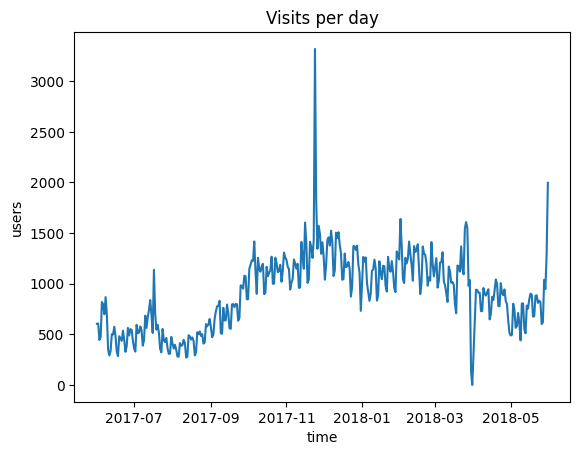

In [14]:
plt.plot(sessions_and_visits_per_day['visits_per_day'])
plt.xlabel('time')
plt.ylabel('users')
plt.title("Visits per day")
plt.show()

In [15]:
sessions_and_visits_per_day['visits_per_day'].describe()

count     364.000000
mean      907.991758
std       370.513838
min         1.000000
25%       594.000000
50%       921.000000
75%      1173.000000
max      3319.000000
Name: visits_per_day, dtype: float64

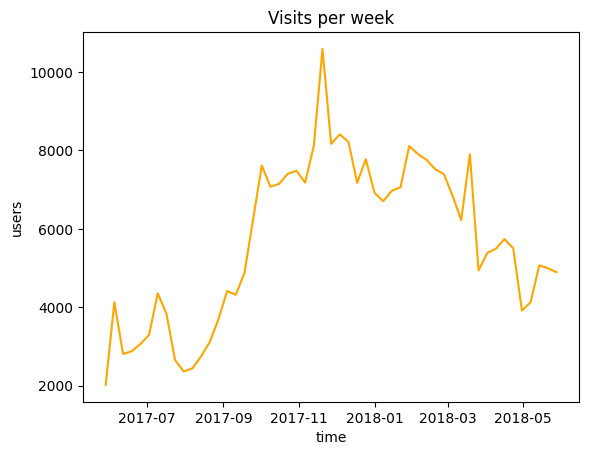

In [16]:
visits_per_week = visits.groupby('week')['uid'].nunique()
plt.plot(visits_per_week, color='orange')
plt.xlabel('time')
plt.ylabel('users')
plt.title("Visits per week")
plt.show()

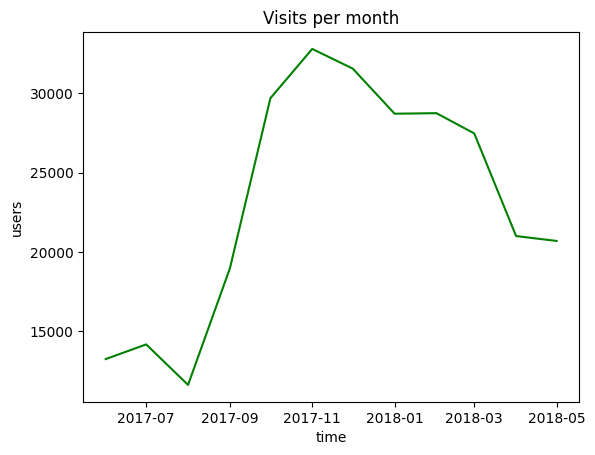

In [17]:
visits_per_month = visits.groupby('month')['uid'].nunique()
plt.plot(visits_per_month, color='green')
plt.xlabel('time')
plt.ylabel('users')
plt.title("Visits per month")
plt.show()

Después de analizar las gráficas anteriores, podemos deducir lo siguiente: 
- En la gráfica de visitas por día, se observa que a pesar de que a lo largo del estudio se presenta una ligera tendencia simetrica, donde se tiene el promedio y la mediana de 900 visitas por día, sin embargo, en el mes de diciembre hay un dato atipico donde hubo 3319 visitas, por lo que sería conveniente investigar que fue lo que paso precisamente ese día. 
- En la gráfica de visitas por semana, se oberva que al inicio del estudio las visitas por semanas eran bajas a comparacion de los ultimos meses de 2017 y de los primeros meses de 2018 y es intereante como empiezan a dismunir también esas visitas conforme avanza el 2018.
- En la gráfica de visitas por mes, se oberva claramente la tendencia a la alta que se tiene en los ultimos meses de 2017 como se mencionaba anteriormente, conforme avanza el 2018, las visitas van disminuyendo. 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Magnífico, has representado de manera correcta la información sobre *¿Cuántas personas lo usan cada día, semana y mes?*
    
Las gráficas, aunque son correctas, deben tener un formato adecuado para entender mucho más fácil la información, te recomiendo incluir un **título para cada gráfica además de los nombres de los ejes X y Y**. Adicionalmente, es importante incluir tus **apreciaciones sobre la información que obtienes en cada visualización**
</div>

**¿Cuántas sesiones hay por día?** (Un usuario puede tener más de una sesión).

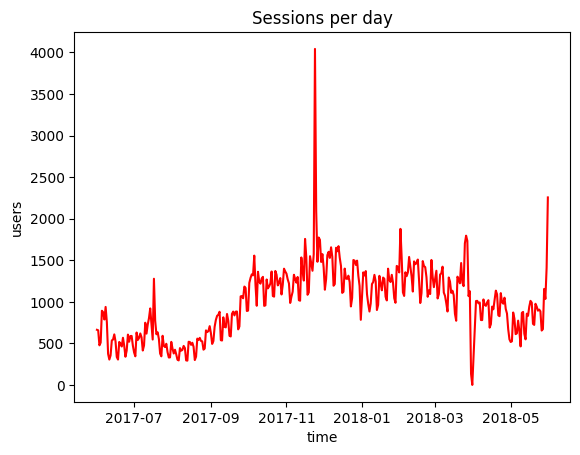

In [18]:
plt.plot(sessions_and_visits_per_day['sessions_per_day'], color='red')
plt.xlabel('time')
plt.ylabel('users')
plt.title("Sessions per day")
plt.show()

In [19]:
sessions_and_visits_per_day['sessions_per_user'] = sessions_and_visits_per_day['sessions_per_day']/sessions_and_visits_per_day['visits_per_day']
sessions_and_visits_per_day['sessions_per_user'].mean()

1.082169644003972

In [20]:
sessions_and_visits_per_day['sessions_per_day'].describe()

count     364.000000
mean      987.362637
std       418.994796
min         1.000000
25%       635.500000
50%      1003.000000
75%      1280.000000
max      4042.000000
Name: sessions_per_day, dtype: float64

<AxesSubplot:>

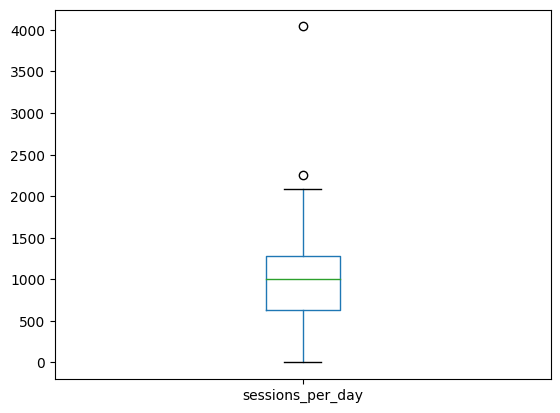

In [21]:
sessions_and_visits_per_day['sessions_per_day'].plot(kind='box')

Después de revisar los datos anteriores, podemos decir que hay una simetría de los datos aunque tengamos 2 valores atipicos podemos tomar la mediana de 1003 sesiones por día. Es preciso señalar que las sesiones pueden llegar a ser más debido a que un usuario puede tener más de una sesión por día. 

**¿Cuál es la duración de cada sesión?**

In [22]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration'].describe(percentiles=[.25,.5,.75, .99])

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
99%        4500.000000
max       84480.000000
Name: session_duration, dtype: float64

<AxesSubplot:>

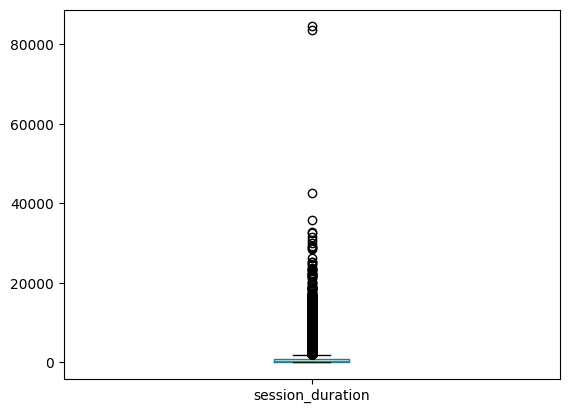

In [23]:
visits['session_duration'].plot(kind='box')

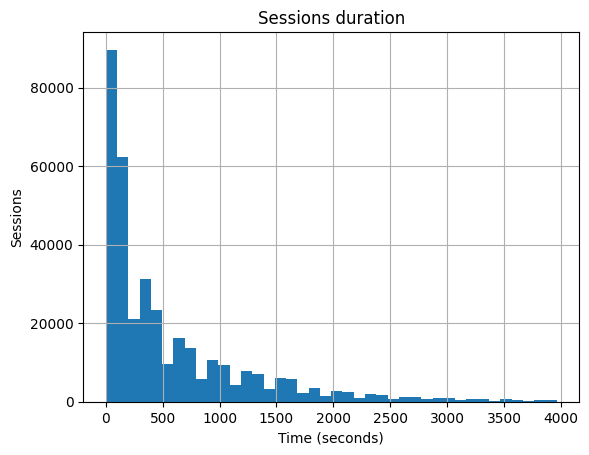

In [24]:
visits.query('session_duration < 4000')['session_duration'].hist(bins=40)
plt.xlabel('Time (seconds)')
plt.ylabel('Sessions')
plt.title("Sessions duration")
plt.show()

Por lo anterior mostrado, se ve claramente que el 50% de las sesiones duran 300 segundos o menos.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
El comentario anterior aplica tambien para esta gráfica que muestra la *¿Cuál es la duración de cada sesión?*.
    
**También te recomiendo separar cada sección de acuerdo con la pregunta a la que estás dando respuesta**, con el fin de que sea más fácil identificar cada respuesta.
</div>

**¿Con qué frecuencia los usuarios regresan?** Para contestar esta pregunta, se tienen que hacer pasos previamente como se muestra a continuación, donde se crea un nuevo *df* el cual servira como base para distintos calculos 

In [25]:
first_visits = (
    visits
    .sort_values(by='start_ts')
    .groupby('uid')
    .head(1)
    .rename(columns={'month':'first_month',
                    'start_ts':'first_visit_at'})
)
first_visits.head()

,device,end_ts,source_id,first_visit_at,uid,day,week,first_month,session_duration
308527,desktop,2017-06-01 00:02:00,5,2017-06-01 00:01:00,13890188992670018146,2017-06-01,2017-05-29,2017-06-01,60
260646,desktop,2017-06-01 00:02:00,3,2017-06-01 00:02:00,16152015161748786004,2017-06-01,2017-05-29,2017-06-01,0
245715,desktop,2017-06-01 00:16:00,3,2017-06-01 00:02:00,16706502037388497502,2017-06-01,2017-05-29,2017-06-01,840
235930,desktop,2017-06-01 00:04:00,3,2017-06-01 00:04:00,8842918131297115663,2017-06-01,2017-05-29,2017-06-01,0
11727,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,10329302124590727494,2017-06-01,2017-05-29,2017-06-01,120


In [26]:
visits_with_cohort = pd.merge(
    visits,
    first_visits[['uid','first_month']],
    on='uid'
)
#visits_with_cohort['month_age'] = (visits_with_cohort['month'] - visits_with_cohort['first_month']) / np.timedelta64(1, 'M')
visits_with_cohort['month_age'] = visits_with_cohort['month'].dt.month - visits_with_cohort['first_month'].dt.month
visits_with_cohort['month_age'] += 12*(visits_with_cohort['month'].dt.year - visits_with_cohort['first_month'].dt.year) 

visits_with_cohort.head()

,device,end_ts,source_id,start_ts,uid,day,week,month,session_duration,first_month,month_age
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18,2017-12-01,1080,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02-01,1680,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26,2017-07-01,0,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14,2018-05-01,1440,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-05,2018-03-01,1680,2018-03-01,0


In [27]:
visits_with_cohort['month_age'].value_counts()

0     267858
1      23294
2      14833
3      11961
4       9977
5       8497
6       6834
7       5290
8       4009
9       3036
10      2193
11      1618
Name: month_age, dtype: int64

In [28]:
visits_retention = visits_with_cohort.pivot_table(
    index='first_month',
    columns='month_age',
    values='uid',
    aggfunc='nunique'
)
visits_retention.fillna('')

month_age,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02-01,22197.0,1267.0,565.0,446.0,,,,,,,,


In [29]:
visits_retention_rate = visits_retention.copy()

for col in visits_retention_rate.columns:
    visits_retention_rate[col] = visits_retention_rate[col] / visits_retention[0]

In [30]:
format_frame = {col: "{:.2%}" for col in range(1, 12, 1)}
format_frame[0] = "{:.0f}"
(
    visits_retention_rate
    .style
    .background_gradient(
        axis=1, subset=[col for col in range(1, 12)]
    ).format(format_frame)
    
)

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/io/formats/style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/io/formats/style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


month_age,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06-01 00:00:00,1,7.87%,5.38%,6.14%,6.86%,7.14%,6.10%,5.78%,5.23%,5.08%,4.07%,4.50%
2017-07-01 00:00:00,1,5.61%,5.13%,5.62%,5.82%,4.82%,4.54%,4.57%,3.88%,2.86%,2.75%,nan%
2017-08-01 00:00:00,1,7.69%,6.29%,6.28%,5.01%,4.40%,3.63%,3.95%,2.79%,2.60%,nan%,nan%
2017-09-01 00:00:00,1,8.55%,6.92%,5.07%,3.94%,3.78%,3.59%,2.42%,2.28%,nan%,nan%,nan%
2017-10-01 00:00:00,1,7.86%,5.22%,3.90%,3.43%,3.22%,2.14%,2.04%,nan%,nan%,nan%,nan%
2017-11-01 00:00:00,1,7.83%,4.41%,3.87%,3.37%,2.34%,2.18%,nan%,nan%,nan%,nan%,nan%
2017-12-01 00:00:00,1,5.58%,3.80%,3.11%,2.03%,1.90%,nan%,nan%,nan%,nan%,nan%,nan%
2018-01-01 00:00:00,1,5.97%,3.93%,2.50%,2.02%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
2018-02-01 00:00:00,1,5.71%,2.55%,2.01%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%


In [31]:
visits_retention_rate[1].mean()

0.06516659710392834

In [32]:
visits_retention_rate.iloc[:,1:].mean().mean()

0.04167273087332413

Con el resultado anterior se muestra el promedio de una tasa de retención global del 4.16%, la cual responde a la pregunta de con que frecuencia los usuarios regresan. Y a continuación se observa graficamente dichas tasas de retención con el tiempo.

<AxesSubplot:xlabel='month_age'>

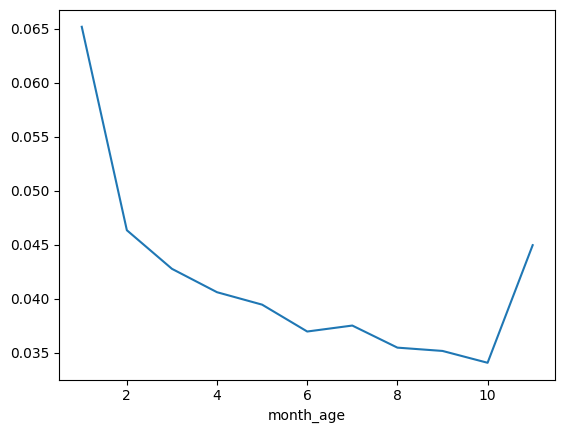

In [33]:
visits_retention_rate.iloc[:,1:].mean().plot(kind='line')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Excelente Trabajo dando respuesta a la pregunta *¿Con qué frecuencia los usuarios regresan?*. Es evidente tu dominio de la función `pivot_table` y de la creación del *heat map*
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

    
Hiciste un gran trabajo dando rspuesta a la mayoría de preguntas con respescto a las visitas de los usuarios. Sin embargo, te faltó responder la siguiente pregunta. **¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).**
    
Recuerda separar cada sección del código de acuerdo con su respectiva pregunta, para darle más claridad al notebook.

</div>




<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
    Se contesto esta obervación arriba y se anotaron los comentarios correspondientes.
</div> 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo con los ajustes  Pablo

</div>


## Ventas:

**¿Cuándo empieza la gente a comprar?** (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)

In [34]:
orders.columns

Index(['buy_ts', 'revenue', 'uid', 'day', 'week', 'month'], dtype='object')

In [35]:
first_orders = (
    orders
    .sort_values(by='buy_ts')
    .groupby('uid')
    .head(1)
    .rename(columns={'month':'first_order_month',
                    'buy_ts':'first_order_at'})
)
first_orders.head()

,first_order_at,revenue,uid,day,week,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-05-29,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-05-29,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-05-29,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-05-29,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-05-29,2017-06-01


In [36]:
first_visits.columns

Index(['device', 'end_ts', 'source_id', 'first_visit_at', 'uid', 'day', 'week',
       'first_month', 'session_duration'],
      dtype='object')

In [37]:
coversion_timestamps = pd.merge(
    first_orders[['uid', 'first_order_month', 'first_order_at']],
    first_visits[['uid', 'first_visit_at', 'first_month', 'source_id']]
)
coversion_timestamps['time_to_order'] = coversion_timestamps['first_order_at'] - coversion_timestamps['first_visit_at']
coversion_timestamps['time_to_order'] /= np.timedelta64(1, 'h')
coversion_timestamps.head(2)

,uid,first_order_month,first_order_at,first_visit_at,first_month,source_id,time_to_order
0,10329302124590727494,2017-06-01,2017-06-01 00:10:00,2017-06-01 00:09:00,2017-06-01,1,0.016667
1,11627257723692907447,2017-06-01,2017-06-01 00:25:00,2017-06-01 00:14:00,2017-06-01,2,0.183333


In [38]:
coversion_timestamps['time_to_order'].describe()

count    36523.000000
mean       405.669597
std       1129.746245
min          0.000000
25%          0.066667
50%          0.266667
75%         48.283333
max       8719.066667
Name: time_to_order, dtype: float64

En los pasos anteriores, se crea primero first_orders para juntarlo con first_visits, esto con la finalidad de saber en primera instancia en que momento empiezan o hacen su primera compra después de su primera visita y después se hizo el cálculo para obtener el time_to_order

In [39]:
conversion_hours = {
    '0d': 24,
    '1d': 48,
    '2d': 72,
    '3d': 96,
    '7d': 168,
    '14d': 336,
    '28d': 672,
    '50d': 1224,
    '100': 2424
}

total_users = len(coversion_timestamps)

for label, hours in conversion_hours.items():
    conversion_rate = sum(coversion_timestamps['time_to_order'] < hours) / total_users
    
    print(f"Conversion {label}: {conversion_rate:.3%}")

Conversion 0d: 72.182%
Conversion 1d: 74.950%
Conversion 2d: 76.492%
Conversion 3d: 77.680%
Conversion 7d: 80.018%
Conversion 14d: 82.822%
Conversion 28d: 86.053%
Conversion 50d: 89.201%
Conversion 100: 93.566%


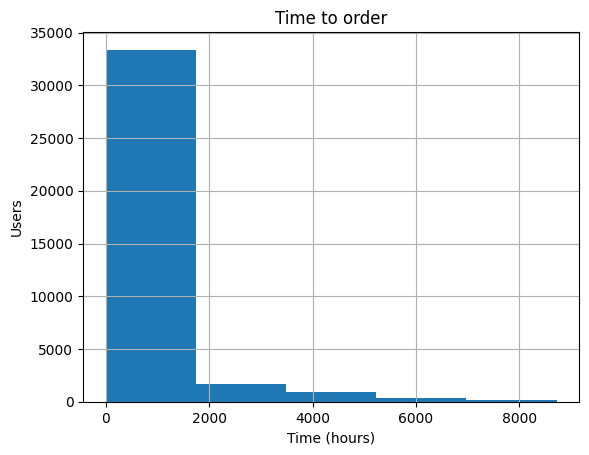

In [40]:
coversion_timestamps['time_to_order'].hist(bins=5)
plt.xlabel('Time (hours)')
plt.ylabel('Users')
plt.title("Time to order")
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Aunque tu lógica para responder la pregunta *¿Cuándo empieza la gente a comprar?*, es adecuada la gráfica que obtienes no es del todo correcta, además no es claro que representa cada eje. Por esa razón es importante colocar los nombres de X y Y, además del título. 
    
Por otro lado, podrias hacer el calculo de tiempo entre la primera visita y la primera compra, no en horas `(np.timedelta64(1, 'h'))`, sino directamente en días, para esto puedes usar la siguiente expresión:
      
    np.timedelta64(1,'D')).astype('int')     
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
    Respecto a los comentarios se realizó un .describe() para observar el comportamiento de los datos y al principio se dejo en horas porque en días quedaba muy extenso como se muestra en el metodo describe(), ya se colocaron los datos necesarios del histograma y es que si lo hago directamente en días, como quedaría el bucle? o la grafica también no tendría sentido? o hay que cambiar de tipo de gráfica? 
</div> 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>
    
En el contexto del proyecto, la información por días es más valiosa, pero en general el comportamiento de la distribución de los datos será similar, donde la mayoría de compras se hacen en los primeros días.
    
    
</div>

**¿Cuántos pedidos hacen durante un período de tiempo dado?**


In [41]:
orders_per_day = orders.groupby('day')['uid'].count()
orders_per_day.describe()

count    364.000000
mean     138.502747
std       76.858480
min        1.000000
25%       82.750000
50%      136.000000
75%      177.000000
max      814.000000
Name: uid, dtype: float64

<AxesSubplot:>

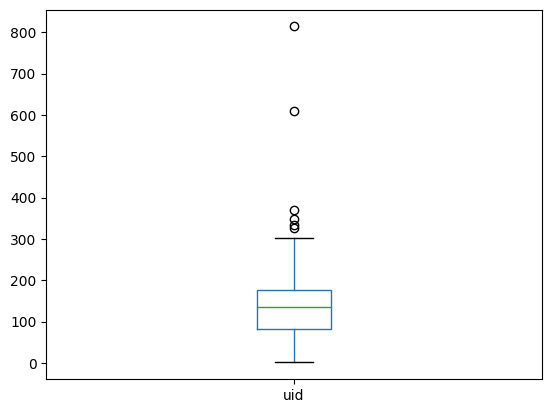

In [42]:
orders_per_day.plot(kind='box')

De acuerdo al gráfico anterior y la descripción de los datos podemos decir que La media y la mediana son similares, lo que sugiere simetría en la mayoría de los datos y que por lo tanto decir que hay 138 pedidos es correcto a pesar de tener algunos datos sesgados.

In [43]:
orders_per_week = orders.groupby('week')['uid'].count()
orders_per_week.describe()

count      53.000000
mean      951.226415
std       396.439958
min       314.000000
25%       636.000000
50%       991.000000
75%      1257.000000
max      1894.000000
Name: uid, dtype: float64

<AxesSubplot:>

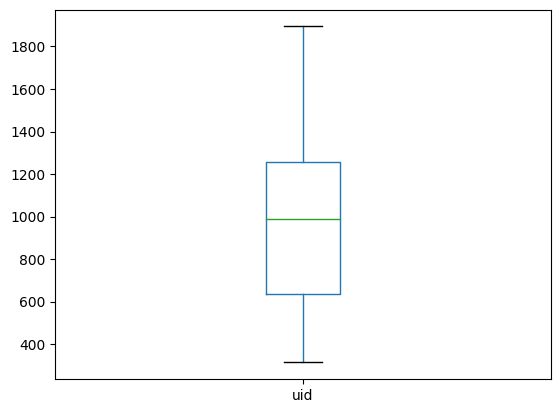

In [44]:
orders_per_week.plot(kind='box')

En promedio hay 951 ordenes por semana, debido a la simetria de los datos 

In [45]:
orders_per_month = orders.groupby('month')['uid'].count()
orders_per_month.describe()

count      13.000000
mean     3878.076923
std      1858.113401
min         1.000000
25%      2363.000000
50%      4346.000000
75%      5326.000000
max      6218.000000
Name: uid, dtype: float64

<AxesSubplot:>

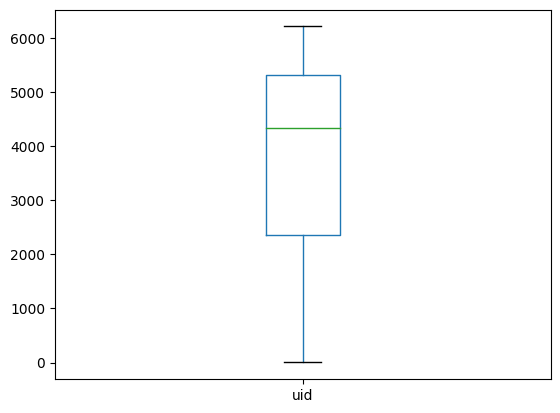

In [46]:
orders_per_month.plot(kind='box')

En promedio hay 3878 ordenes por mes, debido a la simetria de los datos

**¿Cuál es el tamaño promedio de compra?**

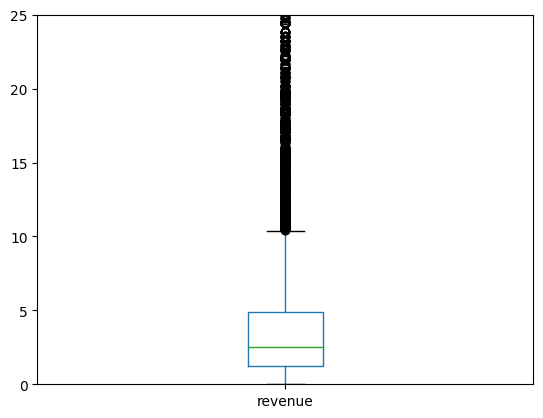

In [47]:
orders_size_per_day = orders['revenue'].plot(kind='box',ylim=(0, 25))

In [48]:
orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

Se puede concluir que los datos están sesgados hacia la derecha. Esto significa que la media puede no ser el mejor indicador del "tamaño típico" de compra, ya que está siendo afectada por valores extremadamente altos. Para tener una mejor idea del tamaño promedio de compra, sería más adecuado utilizar la mediana en lugar de la media, la mediana de **2.50** probablemente sea una mejor representación del tamaño "típico" de las compras.

**¿Cuánto dinero traen? (LTV)**

In [49]:
revenue_by_user_per_month = (
    orders
    .groupby(['uid', 'month'])['revenue']
    .sum()
    .reset_index()
)
revenue_by_user_per_month.head()

,uid,month,revenue
0,313578113262317,2018-01-01,0.55
1,1575281904278712,2017-06-01,3.05
2,2429014661409475,2017-10-01,73.33
3,2464366381792757,2018-01-01,2.44
4,2551852515556206,2017-11-01,10.99


Para calcular el ltv se pretende realizar por pasos, lo primero que se calculó fue el revenue por usuario al mes, 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Pablo no es del todo claro qué parte del código corresponde a *¿Cuántos pedidos hacen durante un período de tiempo dado?* y qué parte corresponde a *¿Cuál es el tamaño promedio de compra?*. Debes separar cada sección por su respectiva pregunta e incluir un análisis que permita dar una respuesta puntual a cada pregunta.
    

</div>

In [50]:
revenues_with_cohort = pd.merge(
    revenue_by_user_per_month,
    first_visits[['uid','source_id']],
    on='uid'
).merge(
    first_orders[['uid', 'first_order_month', 'first_order_at']],
    on='uid'
) 
#visits_with_cohort['month_age'] = (visits_with_cohort['month'] - visits_with_cohort['first_month']) / np.timedelta64(1, 'M')

revenues_with_cohort['month_age'] = revenues_with_cohort['month'].dt.month - revenues_with_cohort['first_order_month'].dt.month
revenues_with_cohort['month_age'] += 12*(revenues_with_cohort['month'].dt.year - revenues_with_cohort['first_order_month'].dt.year)

ltv_table = revenues_with_cohort.pivot_table(
    index='first_order_month',
    columns='month_age',
    values='revenue',
    aggfunc='mean'
)
ltv_table.fillna('')

month_age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,16.09541,17.7068,35.764815,23.506591,22.207761,31.011935,25.033191,19.29569,27.233556,25.681333,9.804151
2017-07-01,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,
2017-08-01,5.276518,11.148793,11.851321,12.182955,16.92125,12.139063,9.620333,12.610455,21.07,8.307419,,
2017-09-01,5.644529,22.188385,13.4452,138.669189,19.881538,26.095,27.437121,16.961351,11.044651,,,
2017-10-01,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,,,,
2017-11-01,5.154683,7.339054,6.786583,12.51066,7.457284,4.580833,7.564839,,,,,
2017-12-01,4.738191,7.816575,39.366019,48.135052,27.4314,23.518413,,,,,,
2018-01-01,4.135636,8.721228,12.365542,11.199767,4.699556,,,,,,,
2018-02-01,4.156987,8.61,4.942414,6.941026,,,,,,,,


In [51]:
ltv_global = ltv_table.mean().sum()
print(ltv_global)

180.8016925238521


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Excelente trabajo calculando el LTV, la tabla que estás mostrando es completamente correcta.
</div>

## Marketing
 **¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo)**

In [52]:
costs.head(2)

,source_id,dt,costs,day,week,month
0,1,2017-06-01,75.20,2017-06-01,2017-05-29,2017-06-01
1,1,2017-06-02,62.25,2017-06-02,2017-05-29,2017-06-01


In [53]:
total_costs = costs['costs'].sum()
print(total_costs)

329131.62


**El costo total que se invirtió en Marketing fue de $329,131.62**

In [54]:
costs_by_source = (
    costs
    .groupby('source_id')['costs']
    .sum()
    .reset_index()
)
print("Gasto por fuente de adquisición:")
print(costs_by_source)

Gasto por fuente de adquisición:
   source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


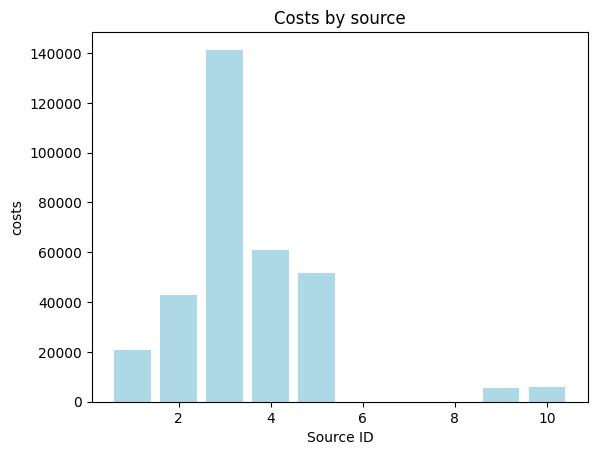

In [55]:
plt.bar(costs_by_source['source_id'], costs_by_source['costs'],color='lightblue')
plt.xlabel('Source ID')
plt.ylabel('costs')
plt.title('Costs by source')
plt.show()

En la tabla anterior se visualiza los costos totales por source_id

In [56]:
monthly_costs = costs.groupby('month')['costs'].sum().reset_index()
print("Gasto mensual:")
print(monthly_costs)

Gasto mensual:
        month     costs
0  2017-06-01  18015.00
1  2017-07-01  18240.59
2  2017-08-01  14790.54
3  2017-09-01  24368.91
4  2017-10-01  36322.88
5  2017-11-01  37907.88
6  2017-12-01  38315.35
7  2018-01-01  33518.52
8  2018-02-01  32723.03
9  2018-03-01  30415.27
10 2018-04-01  22289.38
11 2018-05-01  22224.27


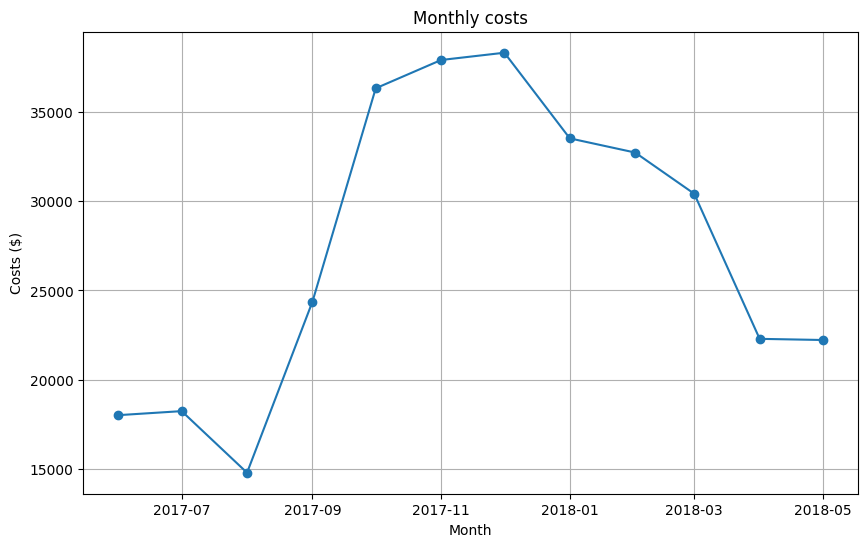

In [57]:
plt.figure(figsize=(10,6))
plt.plot(monthly_costs['month'], monthly_costs['costs'], marker='o')
plt.title('Monthly costs')
plt.xlabel('Month')
plt.ylabel('Costs ($)')
plt.grid(True)
plt.show()

En la gráfica anterior se muestra el gasto en marketing de manera mensual, que corresponde de igual manera a los datos en visits y orders en las fechas de aumento en los ultimos meses de 2017

Para contestar a la pregunta de ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes? se tienen que realizar los pasos que se presentan a continuación, empezando por los costos mensuales: 


In [58]:
monthly_costs = (
    costs
    .groupby(['month', 'source_id'])['costs']
    .sum()
    .reset_index()
)
monthly_costs.head(2)

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38


In [59]:
first_orders_with_source = pd.merge(
    first_orders,
    first_visits[['uid','source_id']],
    on='uid'
)
first_orders_with_source.head(2)

,first_order_at,revenue,uid,day,week,first_order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-05-29,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-05-29,2017-06-01,2


In [60]:
monthly_adquisition = (
    first_orders_with_source
    .groupby(['source_id','first_order_month'])['uid']
    .nunique()
    .reset_index()
    .rename(columns={'uid':'new_users','first_order_month':'month'})
)
monthly_adquisition.head(2)

,source_id,month,new_users
0,1,2017-06-01,190
1,1,2017-07-01,160


Con el merge que se hizo en un paso anterior nos sirve de base para calcular la adquisión de nuevos clientes por fuente que nos servirá para contestar la pregunta que se esta buscando, es decir, combinando la adquisión con los costos, obtendremos el costo de adquisión de clientes por mes

**¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?**


In [61]:
monthly_cac = pd.merge(
    monthly_adquisition,
    monthly_costs,
    on=['month','source_id']
)
monthly_cac['cac'] = monthly_cac['costs'] / monthly_cac['new_users']

cac_table = monthly_cac.groupby('source_id')['cac'].mean().reset_index()
print(cac_table)

   source_id        cac
0          1   7.212107
1          2  12.504068
2          3  13.802743
3          4   6.439374
4          5   7.451938
5          9   5.413892
6         10   4.867125


Se presenta un promedio de los costos de adquisición por cliente por fuente y a continuación se muestra una gráfica de la variación de los cac a lo largo de los meses por fuente de adquisición.

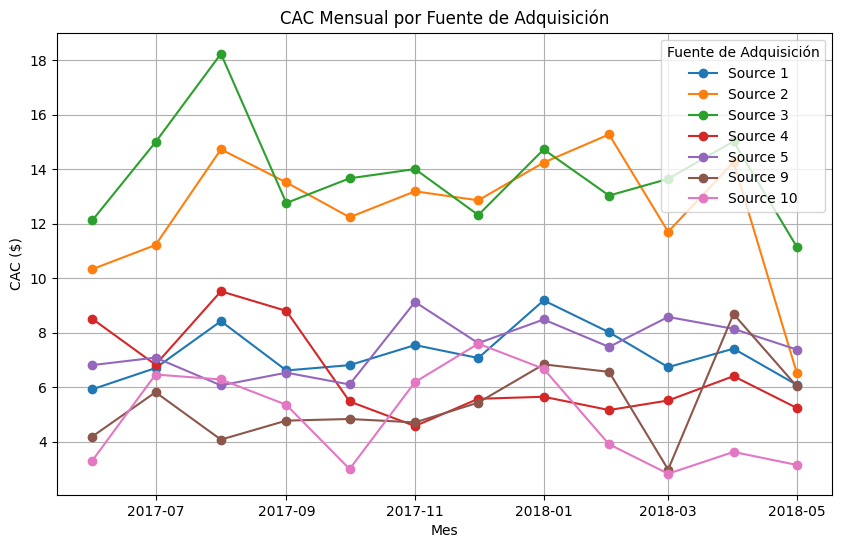

In [62]:
plt.figure(figsize=(10,6))
for source in monthly_cac['source_id'].unique():
    source_data = monthly_cac[monthly_cac['source_id'] == source]
    plt.plot(source_data['month'], source_data['cac'], marker='o', label=f'Source {source}')

plt.title('CAC Mensual por Fuente de Adquisición')
plt.xlabel('Mes')
plt.ylabel('CAC ($)')
plt.legend(title="Fuente de Adquisición")
plt.grid(True)
plt.show()

La presente gráfica nos ayuda a visualizar como es que varía por mes el costo de adquisición de clientes, cabe resaltar que las fuentes 2 y 3 son las que representan un promedio más elevado del cac, por lo que sería interesante revisar si esas son las que aportan más clientes a comparacoón con las demás.

In [63]:
revenues_with_cohort.head(2)

,uid,month,revenue,source_id,first_order_month,first_order_at,month_age
0,313578113262317,2018-01-01,0.55,2,2018-01-01,2018-01-03 21:51:00,0
1,1575281904278712,2017-06-01,3.05,10,2017-06-01,2017-06-03 10:13:00,0


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>
    
Muy buen trabajo con los ajustes, ahora has encontrado información más valiosa para el contexto del proyecto.
</div>



**¿Cuán rentables eran las inversiones? (ROMI)**

In [64]:
report_ = pd.merge(
    revenues_with_cohort,
    monthly_cac,            
    on=['source_id', 'month']  
)
report_.head()

,uid,month,revenue,source_id,first_order_month,first_order_at,month_age,new_users,costs,cac
0,313578113262317,2018-01-01,0.55,2,2018-01-01,2018-01-03 21:51:00,0,292,4157.74,14.238836
1,57885047520933118,2018-01-01,2.56,2,2018-01-01,2018-01-31 17:31:00,0,292,4157.74,14.238836
2,109028781533433288,2018-01-01,7.94,2,2018-01-01,2018-01-16 23:24:00,0,292,4157.74,14.238836
3,214813444283416986,2018-01-01,6.11,2,2018-01-01,2018-01-23 00:14:00,0,292,4157.74,14.238836
4,239481632267640520,2018-01-01,4.28,2,2018-01-01,2018-01-22 12:48:00,0,292,4157.74,14.238836


In [65]:
report_['romi'] = report_['revenue'] / report_['cac']

output = report_.pivot_table(
    index='first_order_month',        
    columns='month_age',       
    values='romi',         
    aggfunc='mean'         
)
output = output.cumsum(axis=1).round(2).fillna('')

print(output)

month_age            0     1     2      3      4      5      6      7      8   \
first_order_month                                                               
2017-06-01         0.59  2.74  4.87   9.28   12.6  16.03  20.28  22.89  25.11   
2017-07-01         0.70  1.98  5.08   6.47   7.32   8.34   9.07   9.87  10.96   
2017-08-01         0.59  2.05  3.84   5.43   7.59    9.1  10.35  12.18  14.88   
2017-09-01         0.65  3.04  4.53  22.73  24.68  27.99  31.69   33.6  35.24   
2017-10-01         0.69  1.84  2.65   3.46   4.27   5.33   6.17   7.29          
2017-11-01         0.69   1.7  2.43   4.11   5.19   5.71   6.99                 
2017-12-01         0.59  1.31  4.19   8.55  10.59   14.2                        
2018-01-01         0.48  1.43  2.75   4.06   4.73                               
2018-02-01         0.54  1.57  2.03   3.03                                      
2018-03-01         0.68  2.04  4.74                                             
2018-04-01         0.55   2.

In [66]:
report_.head()

,uid,month,revenue,source_id,first_order_month,first_order_at,month_age,new_users,costs,cac,romi
0,313578113262317,2018-01-01,0.55,2,2018-01-01,2018-01-03 21:51:00,0,292,4157.74,14.238836,0.038627
1,57885047520933118,2018-01-01,2.56,2,2018-01-01,2018-01-31 17:31:00,0,292,4157.74,14.238836,0.179790
2,109028781533433288,2018-01-01,7.94,2,2018-01-01,2018-01-16 23:24:00,0,292,4157.74,14.238836,0.557630
3,214813444283416986,2018-01-01,6.11,2,2018-01-01,2018-01-23 00:14:00,0,292,4157.74,14.238836,0.429108
4,239481632267640520,2018-01-01,4.28,2,2018-01-01,2018-01-22 12:48:00,0,292,4157.74,14.238836,0.300586


Podemos observar que todos los meses existió un ROMI positivo lo que significa que la campaña está generando más ingresos que lo que costó. Podriamos considerar lo siguiente:

- Reinvertir en las campañas más efectivas: Identifica las estrategias que están generando el mejor retorno y destina más recursos a esas áreas.

- Explorar nuevas oportunidades: Con un margen positivo, puedes experimentar con nuevas tácticas de marketing, nuevos canales o segmentos de mercado.

- Optimizar el presupuesto: Evalúa si hay áreas donde podrías reducir costos sin sacrificar el rendimiento, mejorando aún más el ROMI. 

A continuación se calcula el romi por fuente: 

In [67]:
source_data.head()

,source_id,month,new_users,costs,cac
72,10,2017-06-01,95,314.22,3.307579
73,10,2017-07-01,51,329.82,6.467059
74,10,2017-08-01,37,232.57,6.285676
75,10,2017-09-01,86,460.67,5.356628
76,10,2017-10-01,209,627.24,3.001148


In [68]:
report_['source_id'].unique()

array([ 2, 10,  3,  5,  4,  1,  9])

In [69]:
source_ids = report_['source_id'].unique()

for source in source_ids:
    source_data = report_[report_['source_id'] == source]
    romi_by_source = source_data.pivot_table(
        index='first_order_month',        
        columns='month_age',       
        values='romi',         
        aggfunc='mean'         
    )
    
    romi_by_source = romi_by_source.cumsum(axis=1).round(2).fillna('')
    
    # Mostrar la tabla de ROMI para cada source_id
    print(f"ROMI para source_id: {source}")
    print(romi_by_source)
    print("\n" + "="*50 + "\n")


ROMI para source_id: 2
month_age            0     1      2      3      4      5      6      7   \
first_order_month                                                         
2017-06-01         0.43  1.72   2.26   4.65   6.25    7.0   8.62  11.07   
2017-07-01         0.75   2.1   2.23    2.6   3.17   3.67   4.54   4.75   
2017-08-01         0.39  1.24   1.47   2.05   2.87   3.05    3.3   3.99   
2017-09-01         0.61  7.29   9.01  10.23  12.96  14.14  18.96  21.29   
2017-10-01         0.63  2.62   3.75   4.75    5.6   6.35    6.7   8.23   
2017-11-01         0.53  1.66   2.77   5.04    6.1    6.5   7.38          
2017-12-01         0.69  2.65  19.28  43.38  50.77  69.51                 
2018-01-01         0.31  1.46   4.35   5.19   6.66                        
2018-02-01         0.35  1.71   2.44   4.08                               
2018-03-01         0.45  1.75   9.77                                      
2018-04-01         0.40  2.26                                             
20

In [70]:
romi_mean_by_source = report_.groupby('source_id')['romi'].mean().reset_index()
print(romi_mean_by_source)

   source_id      romi
0          1  1.285635
1          2  0.943978
2          3  0.351434
3          4  0.874787
4          5  0.934642
5          9  0.852880
6         10  0.787722


Por lo anterior podemos observar que la fuente que genera un mayor ingreso fue la número 1. 

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Para esta última parte fue mucho más complicado indentificar que sección de código está dando respuesta a cada pregunta. Debes tener en cuenta los siguiente para cada pregunta:
    
    
*¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)*
    
Debes calcular el **valor total** para el registro de compra de los usuarios, pero también cuando se habla de *a lo largo del tiempo* puedes hacer el cáluculo por mes, y moestratlo en una gráfica. Por otro lado, debes considerar las fuentes de adquisición que corresponde a `source_id` del dataset de **visits**, recuerda que esta columna corresponde al identificador de la fuente de anuncios de la que proviene el usuario.
    
    
    
*¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?*

Para esta pregunta, tu lógica es valida pero, debes mostrar la información de todos los `source_id`, y dado el contexto del proyecto es mejor ver cómo varian mes a mes, para esto puedes usar una gráfica. 
 
    
*¿Cuán rentables eran las inversiones? (ROMI)*    
    
La información de `ltv_table` es correcta. Pero ahora lo que debes hacer es discretizar esa información por `source_id` y mosrtar la información del *ROMI by source*, con una estructura similar a la tabla del LVT   

</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>
    
Ya estás más cerca del resultado deseado, pero acá estás combinando información, por eso la tabla final no tiene mucho sentido.
Para mostrar la información de manera correcta tu **output** debe tener las filas con los meses del `first_order_month`, en las columnas `age` y los valors serían el `romi`. De hecho, tu lo describres así en el comentario antes de crear el **output**, pero ya en el código lo haces diferente.
    
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (3ra Iteración)</b> <a class=“tocSkip”></a>
    
Pablo ahora el proceso de cálculo del ROMI es correcto, pero si te das cuenta aún falta algo para lograr responder la pregunta *¿Cuán rentables eran las inversiones?*. Si queremos darle respuesta debemos comparar el comportamiento del **output** pero de forma independiente para cada `source_id`. 
    
    
    
Para lograr esto lo que puedes hacer es un *for loop* donde filtres el **output** por cada `source_id` y muestres la tabla de ROMI para cada `source_id` de forma independiente. **De esa forma tendrás una tabla por cada `source_id`, lo que te permitirá comparar la rentabilidad de cada fuente de inversión por separado** , lo cual es una información clave para determinar cuál de éstas fuentes tiene un mayor impacto en el área de marketing.
    
    
    
Con este ajuste tu proyecto quedará perfecto 🦾
    
</div>

-----

<div class="alert alert-block alert-danger">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Pablo, tu desempeño en este proyecto muestra un gran potencial como analista de datos. Tu análisis exploratorio de datos y los ajustes realizados fueron muy buenos, demostrando una sólida comprensión de los conceptos fundamentales. Es especialmente destacable tu excelente trabajo en la sección de "Visitas", aunque te animo a revisar y completar la pregunta que quedó sin responder. En la sección de "Ventas", tu análisis fue igualmente impresionante, pero te sugiero mejorar la organización para que sea más fácil identificar qué parte del código corresponde a cada pregunta. En cuanto a la sección de "Marketing", es importante que reorientes tu enfoque para mostrar la información por mes y por source_id, lo cual proporcionará insights más valiosos. En general, te recomiendo ajustar la estructura de tu notebook para mejorar su claridad y organización. Esto no solo hará que tu trabajo sea más fácil de seguir, sino que también resaltará la calidad de tus análisis. También es importante incluir tus apreciaciones en cada pregunta, esto permitirá que desarrolles tus habilidades de análisis de datos. Con estos ajustes en la presentación y organización, tu proyecto reflejará aún mejor tu capacidad analítica. Confío en que puedes implementar estas mejoras y llevar tu trabajo al siguiente nivel. Estaré atente a tu próxima iteración 👀
    
</div>



<div class="alert alert-block alert-warning">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>
    
Pablo has hecho varios de los ajustes necesarios para tu proyecto. Solo te resta revisar la última pregunta relacionada con el ROMI
    
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (4ta Iteración)</b> <a class=“tocSkip”></a>
    
Pablo has realizado todos los ajustes necesarios y ahora tu proyecto cumple con los objetivos propuestos. Muy buen trabajo. Estoy seguro que lo que has aprendido acá te servirá en futuros proyectos. Éxitos en tu próximo sprint 🚀
    
    
</div>